<a href="https://colab.research.google.com/github/rubanzasilva/mnist_basics/blob/dev/Copy_of_mnist_full_ds_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import pandas as pd

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
#hide
Path.BASE_PATH = path

In [ ]:
(path/'testing').ls()

(#10) [Path('testing/0'),Path('testing/7'),Path('testing/1'),Path('testing/5'),Path('testing/6'),Path('testing/2'),Path('testing/8'),Path('testing/3'),Path('testing/9'),Path('testing/4')]

In [ ]:
path.ls()

(#2) [Path('testing'),Path('training')]

As we see in the above dataset, there are folders of zeros,ones etc. using .sorted to ensure we get the same order of files

In [ ]:
#read in training digits
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()
nines

(#5949) [Path('training/9/10003.png'),Path('training/9/10004.png'),Path('training/9/10023.png'),Path('training/9/10028.png'),Path('training/9/10038.png'),Path('training/9/10043.png'),Path('training/9/10047.png'),Path('training/9/1005.png'),Path('training/9/10055.png'),Path('training/9/10059.png')...]

In [ ]:
im9 = Image.open(nines[5])
im9

In [ ]:
#read in test set digits
valid_zeros = (path/'testing/0').ls().sorted()
valid_ones = (path/'testing/1').ls().sorted()
valid_twos = (path/'testing/2').ls().sorted()
valid_threes = (path/'testing/3').ls().sorted()
valid_fours = (path/'testing/4').ls().sorted()
valid_fives = (path/'testing/5').ls().sorted()
valid_sixes = (path/'testing/6').ls().sorted()
valid_sevens = (path/'testing/7').ls().sorted()
valid_eights = (path/'testing/8').ls().sorted()
valid_nines = (path/'testing/9').ls().sorted()
valid_nines

(#1009) [Path('testing/9/1000.png'),Path('testing/9/1005.png'),Path('testing/9/1013.png'),Path('testing/9/104.png'),Path('testing/9/1045.png'),Path('testing/9/1048.png'),Path('testing/9/105.png'),Path('testing/9/1058.png'),Path('testing/9/1063.png'),Path('testing/9/108.png')...]

In [ ]:
Image.open(valid_eights[3])

In [ ]:
#image conversion to tensor
im9_tensor = tensor(im9)
im9_tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  70, 140, 254, 254, 254, 1

In [ ]:
#convert all to tensor
zeros_tens =  [tensor(Image.open(o)) for o in zeros]
ones_tens = [tensor(Image.open(o)) for o in ones]
twos_tens = [tensor(Image.open(o)) for o in twos]
threes_tens = [tensor(Image.open(o)) for o in threes]
fours_tens = [tensor(Image.open(o)) for o in fours]
fives_tens = [tensor(Image.open(o)) for o in fives]
sixes_tens = [tensor(Image.open(o)) for o in sixes]
sevens_tens = [tensor(Image.open(o)) for o in sevens]
eights_tens = [tensor(Image.open(o)) for o in eights]
nines_tens = [tensor(Image.open(o)) for o in nines]


In [ ]:
#convert all to tensor
valid_zeros_tens =  [tensor(Image.open(o)) for o in valid_zeros]
valid_ones_tens = [tensor(Image.open(o)) for o in valid_ones]
valid_twos_tens = [tensor(Image.open(o)) for o in valid_twos]
valid_threes_tens = [tensor(Image.open(o)) for o in valid_threes]
valid_fours_tens = [tensor(Image.open(o)) for o in valid_fours]
valid_fives_tens = [tensor(Image.open(o)) for o in valid_fives]
valid_sixes_tens = [tensor(Image.open(o)) for o in valid_sixes]
valid_sevens_tens = [tensor(Image.open(o)) for o in valid_sevens]
valid_eights_tens = [tensor(Image.open(o)) for o in valid_eights]
valid_nines_tens = [tensor(Image.open(o)) for o in valid_nines]


<Axes: >

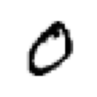

In [ ]:
show_image(zeros_tens[0])

In [ ]:
stacked_zeros = torch.stack(zeros_tens).float()/255
stacked_ones = torch.stack(ones_tens).float()/255
stacked_twos = torch.stack(twos_tens).float()/255
stacked_threes = torch.stack(threes_tens).float()/255
stacked_fours = torch.stack(fours_tens).float()/255
stacked_fives = torch.stack(fives_tens).float()/255
stacked_sixes = torch.stack(sixes_tens).float()/255
stacked_sevens = torch.stack(sevens_tens).float()/255
stacked_eights = torch.stack(eights_tens).float()/255
stacked_nines = torch.stack(nines_tens).float()/255

In [ ]:
valid_stacked_zeros = torch.stack(valid_zeros_tens).float()/255
valid_stacked_ones = torch.stack(valid_ones_tens).float()/255
valid_stacked_twos = torch.stack(valid_twos_tens).float()/255
valid_stacked_threes = torch.stack(valid_threes_tens).float()/255
valid_stacked_fours = torch.stack(valid_fours_tens).float()/255
valid_stacked_fives = torch.stack(valid_fives_tens).float()/255
valid_stacked_sixes = torch.stack(valid_sixes_tens).float()/255
valid_stacked_sevens = torch.stack(valid_sevens_tens).float()/255
valid_stacked_eights = torch.stack(valid_eights_tens).float()/255
valid_stacked_nines = torch.stack(valid_nines_tens).float()/255

In [ ]:
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

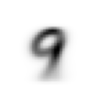

In [ ]:
#calculate mean3 for fun
mean9 = stacked_nines.mean(0)
show_image(mean9)

Mnist Loss Function

In [ ]:
train_x = torch.cat([stacked_zeros,stacked_ones,stacked_twos,stacked_threes,stacked_fours,stacked_fives,stacked_sixes,stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)

In [ ]:
train_y = tensor( [0]*len(zeros) + [1]*len(ones) + [2]*len(twos) + [3]*len(threes) + [4]*len(fours) + [5]*len(fives) + [6]*len(sixes) + [7]*len(sevens) + [8]*len(eights) + [9]*len(nines)).unsqueeze(1)

In [ ]:
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[5923]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
len(zeros)

5923

The zip function aggregates the iterables you pass to it in this case train_x and train_y, hereby pairing the first value of train_x with the first value of train_y in a tuple and so on basically the image and label, x and y i.e. [(train_x[0],train_y[0]),(train_x[1],train_y[1])].

The list function then transforms this object(iterator) into a list.
We can then get the first item of this which would be the first pair.

Querying dset[1] up to dset[5922] will still return the value of y stacked as o because we have 5923 o values stacked up first in the tensor.

x,y = dset[5923] returns (torch.Size([784]), tensor([1])).



In [ ]:
valid_x = torch.cat([valid_stacked_zeros,valid_stacked_ones,valid_stacked_twos,valid_stacked_threes,valid_stacked_fours,valid_stacked_fives,valid_stacked_sixes,valid_stacked_sevens,valid_stacked_eights,valid_stacked_nines]).view(-1, 28*28)
valid_y = tensor( [0]*len(valid_zeros) + [1]*len(valid_ones) + [2]*len(valid_twos) + [3]*len(valid_threes) + [4]*len(valid_fours) + [5]*len(valid_fives) + [6]*len(valid_sixes) + [7]*len(valid_sevens) + [8]*len(valid_eights) + [9]*len(valid_nines)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
#define linear model
def linear1(xb):
  return xb@weights + bias

In [ ]:
#Mnist loss function
def mnist_loss(predictions,targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
#define function to Initialize parameters and return random parameters
#requires_grad tells PyTorch to track gradients when init_params is used

def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()

##Linear Model

1. Initialize parameters

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

Define data loader to do mini batch collation and shuffling

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
#mini batch
batch = train_x[:4]
batch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
label_batch = train_y[:4]
label_batch.shape

torch.Size([4, 1])

In [ ]:
preds = linear1(batch)
preds

tensor([[ -9.2751],
        [-23.0076],
        [-15.8010],
        [ -6.9643]], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds,label_batch)
loss

tensor(0.0003, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
weights.grad.mean(),bias.grad

(tensor(4.4802e-05), tensor([0.0003]))

In [ ]:
corrects = (preds>0.0).float() == label_batch
corrects

tensor([[True],
        [True],
        [True],
        [True]])

In [ ]:
corrects.float().mean().item()

1.0

In [ ]:
def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

In [ ]:
calc_grad(batch,label_batch,linear1)

In [ ]:
weights.grad.mean(),bias.grad

(tensor(8.9603e-05), tensor([0.0005]))

In [ ]:

#calculate grads second time
calc_grad(batch,label_batch,linear1)
weights.grad.mean(),bias.grad

(tensor(0.0001), tensor([0.0008]))

loss.backward adds the gradients of a loss to any gradients that are currently stored. So we have to set the current gradients to 0 first

In [ ]:
weights.grad.zero_(),bias.grad.zero_()

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [

Stepping weights

When stepping the weights, we tell PyTorch not to keep track of the gradients. We do this by assigning a data attribute to the params.

Below is our basic training loop for an epoch

In [ ]:
def train_epoch(model,lr,params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [ ]:
(preds>0.0).float() == label_batch


tensor([[True],
        [True],
        [True],
        [True]])

In [ ]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  corrects = (preds>0.5) == yb
  return corrects.float().mean()

In [ ]:
batch_accuracy(preds,label_batch)

tensor(1.)

In [ ]:
#put batches together
def validate_epoch(model):
  accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [ ]:
validate_epoch(linear1)

0.092

We now have a starting point, lets train for another epoch to see if our model improves.

In [ ]:
lr = 1.
params = weights, bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.0958

In [ ]:
#do a few more
for i in range(20):
  train_epoch(linear1,lr,params)
  print(validate_epoch(linear1), end='')

0.09570.09570.09570.09570.09570.09570.09570.09570.09580.09580.09580.09580.0970.10070.10880.12660.15030.15950.1660.1706

##Using a PyTorch optimizer

Here we replace linear1 with nn.linear which does the same thing as init_params and linear1

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self,params,lr): self.params,self.lr = list(params),lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None


In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
#with this, we can redefine train_epoch
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

fastai provides an SGD class which by default does the same thing as BasicOptim

In [ ]:
opt = SGD(linear_model.parameters(),lr)

In [ ]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model,20)

0.0957 0.1016 0.1157 0.125 0.1322 0.1378 0.1423 0.1471 0.1521 0.1556 0.1593 0.1619 0.1643 0.1668 0.1689 0.1709 0.1728 0.1744 0.1762 0.177 

fastai also provides Learner.fit which we can use instead of train_model.To create a Learner, first we must create a DataLoaders object by passing in the training and validation **DataLoader**'s object.

In [ ]:
dls = DataLoaders(dl, valid_dl)

  To create a Learner without using an application such as Tabular Learner, we need to pass in all the objects that we created above i.e. the model, loss function, DataLoaders, optimzation function which is passed the parameters and any metrics that we might be using.

##Neural Network